# Name : Sasi Venkata Kiran Rachapotu
# Roll No: 52
# Experiment 3

In [40]:
pip install scikit-learn

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [42]:
x = np.array([0, 2, 3, 5,6,7,8,8,9,10]).reshape((-1, 1))
y = np.array([2,4, 5, 6,7.5,8.5, 9,10,11,12])

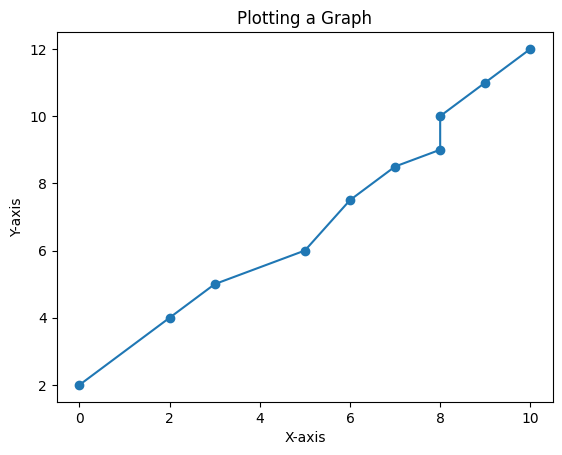

In [43]:
plt.plot(x, y, marker='o')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting a Graph')

plt.show()

In [44]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [45]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9832917172807847


In [46]:
print(f"intercept: {model.intercept_}")

intercept: 1.8274058577405885


In [47]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 1.82740586  3.7834728   4.76150628  6.71757322  7.69560669  8.67364017
  9.65167364  9.65167364 10.62970711 11.60774059]


In [48]:
print(f"slope: {model.coef_}")

slope: [0.97803347]


In [49]:
x_new = np.array([10, 22, 33, 55]).reshape((-1, 1))
x_new

array([[10],
       [22],
       [33],
       [55]])

In [50]:
y_new = model.predict(x_new)
y_new

array([11.60774059, 23.34414226, 34.10251046, 55.61924686])

In [51]:
x = np.array([72,50,81,74,94,86,59,83,65,33,88,81]).reshape((-1, 1))
y = np.array([84,63,77,78,90,75,49,79,77,52,74,90])

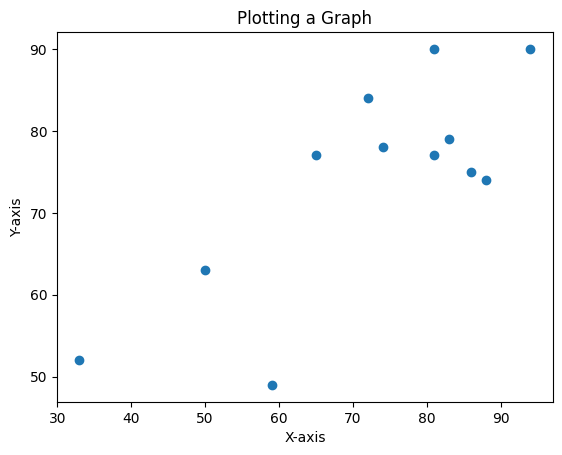

In [52]:
plt.scatter(x, y, marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plotting a Graph')
plt.show()

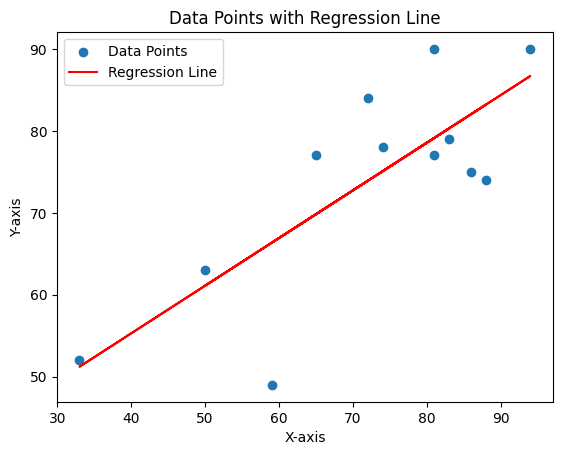

[0.58160008]
[32.02786108]
For x = 86, calculated y = [82.04546774]


In [53]:
def calculate_linear_regression(x_coordinates, y_coordinates):
    n = len(x_coordinates)

    mean_x = sum(x_coordinates) / n
    mean_y = sum(y_coordinates) / n

    numer = sum((x - mean_x) * (y - mean_y) for x, y in zip(x_coordinates, y_coordinates))
    denom = sum((x - mean_x) ** 2 for x in x_coordinates)

    slope = numer / denom
    intercept = mean_y - slope * mean_x

    plt.scatter(x_coordinates, y_coordinates, label='Data Points')
    regression_line = [slope * x + intercept for x in x_coordinates]
    plt.plot(x_coordinates, regression_line, color='red', label='Regression Line')

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Data Points with Regression Line')
    plt.legend()

    plt.show()
    print(slope)
    print(intercept)

    return slope, intercept

def linear_regression_predict(x_value, slope, intercept):
    y_value = slope * x_value + intercept
    return y_value


slope, intercept = calculate_linear_regression(x, y)

x_value = 86

calculated_y = linear_regression_predict(x_value, slope, intercept)
print(f"For x = {x_value}, calculated y = {calculated_y}")

# Multiple Linear Regression on startup dataset

### (a) Load the dataset, display it, visualize various columns and explain the dataset composition

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

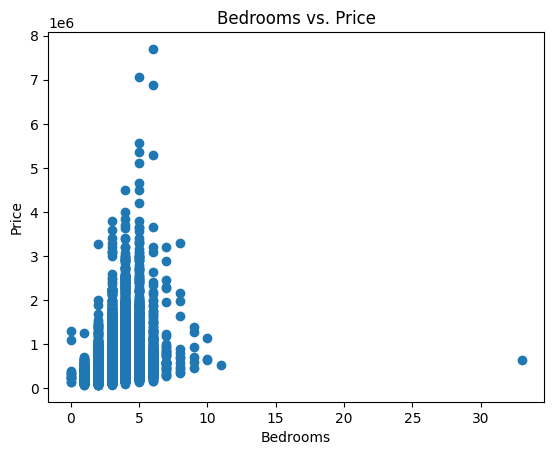

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('kc_house_data.csv')

print(data.head())

plt.scatter(data['bedrooms'], data['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs. Price')
plt.show()

print(data.info())


### (b) Describe the dataset

In [55]:
description = data.describe()
print(description)

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

### (c) Houses with how many bedrooms are most sold?

In [56]:
most_sold_bedrooms = data['bedrooms'].value_counts().idxmax()
print(f"Houses with {most_sold_bedrooms} bedrooms are most sold.")

Houses with 3 bedrooms are most sold.


### (d) Visualizing the location of the houses based on latitude and longitude. Use appropriate plot.

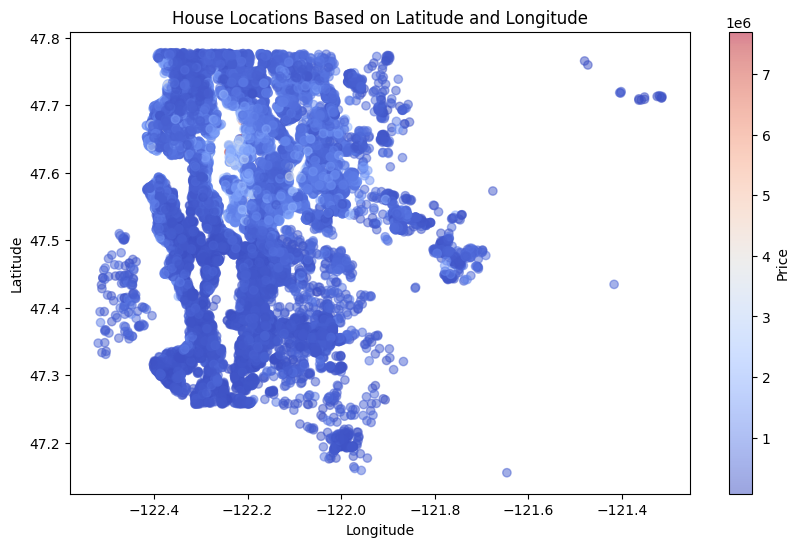

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(data['long'], data['lat'], c=data['price'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Locations Based on Latitude and Longitude')
plt.show()

### Find the correlated features/ columns

In [58]:
correlation_matrix = data.corr()
correlated_features = correlation_matrix['price'].sort_values(ascending=False)
print(correlated_features)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


<ipython-input-58-120134df796d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


### Find null values and fill with mean value for all columns

In [59]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long', 'waterfront'], axis=1)

data = data.fillna(data.mean())
print(data)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  view  \
0      221900.0         3       1.00         1180      5650     1.0     0   
1      538000.0         3       2.25         2570      7242     2.0     0   
2      180000.0         2       1.00          770     10000     1.0     0   
3      604000.0         4       3.00         1960      5000     1.0     0   
4      510000.0         3       2.00         1680      8080     1.0     0   
...         ...       ...        ...          ...       ...     ...   ...   
21608  360000.0         3       2.50         1530      1131     3.0     0   
21609  400000.0         4       2.50         2310      5813     2.0     0   
21610  402101.0         2       0.75         1020      1350     2.0     0   
21611  400000.0         3       2.50         1600      2388     2.0     0   
21612  325000.0         2       0.75         1020      1076     2.0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated 

### Find dependant and independent data (place in X and y)

In [60]:
X = data[['bedrooms', 'bathrooms', 'sqft_living']]
y = data['price']


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 74237634953.18
R-squared: 0.51


In [63]:

arbitrary_input = [[3, 2, 2000]]
predicted_price = model.predict(arbitrary_input)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Predicted Price: $534,649.73
